In [3]:
# Analyze Starbucks locations and plot in a shapefile

import matplotlib.image as image
import geopandas as gpd
import descartes
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
# Create a pandas dataframe from a CSV file
df = pd.read_csv('shapefiles/starbucksdirectory.csv')
# Display first 5 rows
df.head()

Brand  Store Number        Store Name Ownership Type  \
0  Starbucks  47370-257954     Meritxell, 96       Licensed   
1  Starbucks  22331-212325  Ajman Drive Thru       Licensed   
2  Starbucks  47089-256771         Dana Mall       Licensed   
3  Starbucks  22126-218024        Twofour 54       Licensed   
4  Starbucks  17127-178586      Al Ain Tower       Licensed   

                    Street Address              City State/Province Country  \
0                Av. Meritxell, 96  Andorra la Vella              7      AD   
1             1 Street 69, Al Jarf             Ajman             AJ      AE   
2     Sheikh Khalifa Bin Zayed St.             Ajman             AJ      AE   
3                  Al Salam Street         Abu Dhabi             AZ      AE   
4  Khaldiya Area, Abu Dhabi Island         Abu Dhabi             AZ      AE   

  Postcode Phone Number                 Timezone  Longitude  Latitude  
0    AD500    376818720  GMT+1:00 Europe/Andorra       1.53     42.51  
1      NaN          NaN     GMT+04:00 Asia/Dubai      55.47     25.42  
2      NaN          NaN     GMT+04:00 Asia/Dubai      55.47     25.39  
3      NaN          NaN     GMT+04:00 Asia/Dubai      54.38     24.48  
4      NaN          NaN     GMT+04:00 Asia/Dubai      54.54     24.51

In [5]:
# Use pandas groupby to view which cities have the most Starbucks locations
df2 = df.groupby('City').Brand.agg('count').to_frame('Count').reset_index()
df2.sort_values('Count').tail(15).sort_values(by='Count', ascending=False)

City  Count
5298          上海市    542
4176        Seoul    243
5319          北京市    234
3219     New York    232
2626       London    216
4695      Toronto    192
2902  Mexico City    180
811       Chicago    180
2510    Las Vegas    156
4143      Seattle    156
2001      Houston    154
2106     Istanbul    144
4832    Vancouver    141
5465           서울    136
4033    San Diego    135

In [6]:
print ("Total Starbucks in the State of Washington =", df[df['State/Province'] == 'WA'].shape[0])
print('-------------------------')
print ('Total Starbucks in the State of Texas=', df[df['State/Province'] == 'TX'].shape[0])

Total Starbucks in the State of Washington = 757
-------------------------
Total Starbucks in the State of Texas= 1042


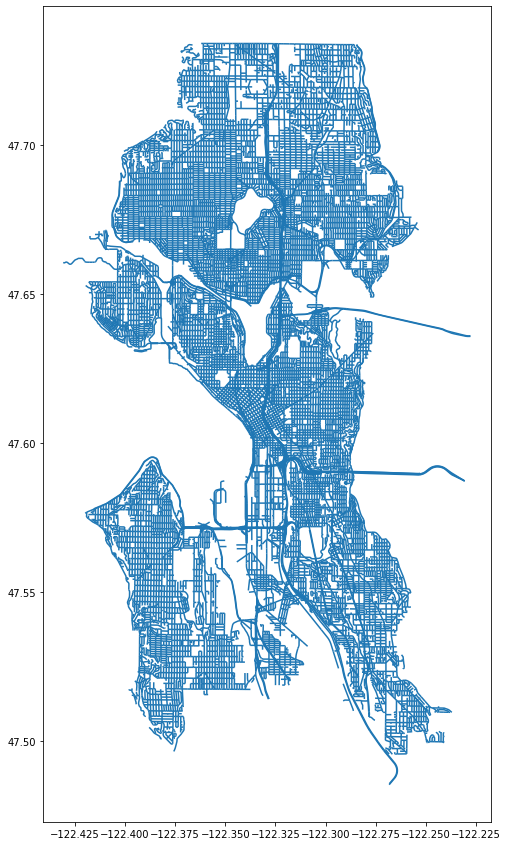

In [7]:
# Open shapefile
seattle_map = gpd.read_file('shapefiles/Seattle_Streets.shp')
fig,ax = plt.subplots(figsize = (15,15))
# Display Seattle, WA using matplotlib
seattle_map.plot(ax = ax)

In [8]:
# Create new geometry dataframe adding new 'geometry' column
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
crs = {'init' : 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, #specify our data
                         crs = crs, #specify our coordinate reference system
                         geometry = geometry) #specify the geomtry list we created
geo_df.head()

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Brand  Store Number        Store Name Ownership Type  \
0  Starbucks  47370-257954     Meritxell, 96       Licensed   
1  Starbucks  22331-212325  Ajman Drive Thru       Licensed   
2  Starbucks  47089-256771         Dana Mall       Licensed   
3  Starbucks  22126-218024        Twofour 54       Licensed   
4  Starbucks  17127-178586      Al Ain Tower       Licensed   

                    Street Address              City State/Province Country  \
0                Av. Meritxell, 96  Andorra la Vella              7      AD   
1             1 Street 69, Al Jarf             Ajman             AJ      AE   
2     Sheikh Khalifa Bin Zayed St.             Ajman             AJ      AE   
3                  Al Salam Street         Abu Dhabi             AZ      AE   
4  Khaldiya Area, Abu Dhabi Island         Abu Dhabi             AZ      AE   

  Postcode Phone Number                 Timezone  Longitude  Latitude  \
0    AD500    376818720  GMT+1:00 Europe/Andorra       1.53     42.51   
1      NaN          NaN     GMT+04:00 Asia/Dubai      55.47     25.42   
2      NaN          NaN     GMT+04:00 Asia/Dubai      55.47     25.39   
3      NaN          NaN     GMT+04:00 Asia/Dubai      54.38     24.48   
4      NaN          NaN     GMT+04:00 Asia/Dubai      54.54     24.51   

                    geometry  
0   POINT (1.53000 42.51000)  
1  POINT (55.47000 25.42000)  
2  POINT (55.47000 25.39000)  
3  POINT (54.38000 24.48000)  
4  POINT (54.54000 24.51000)

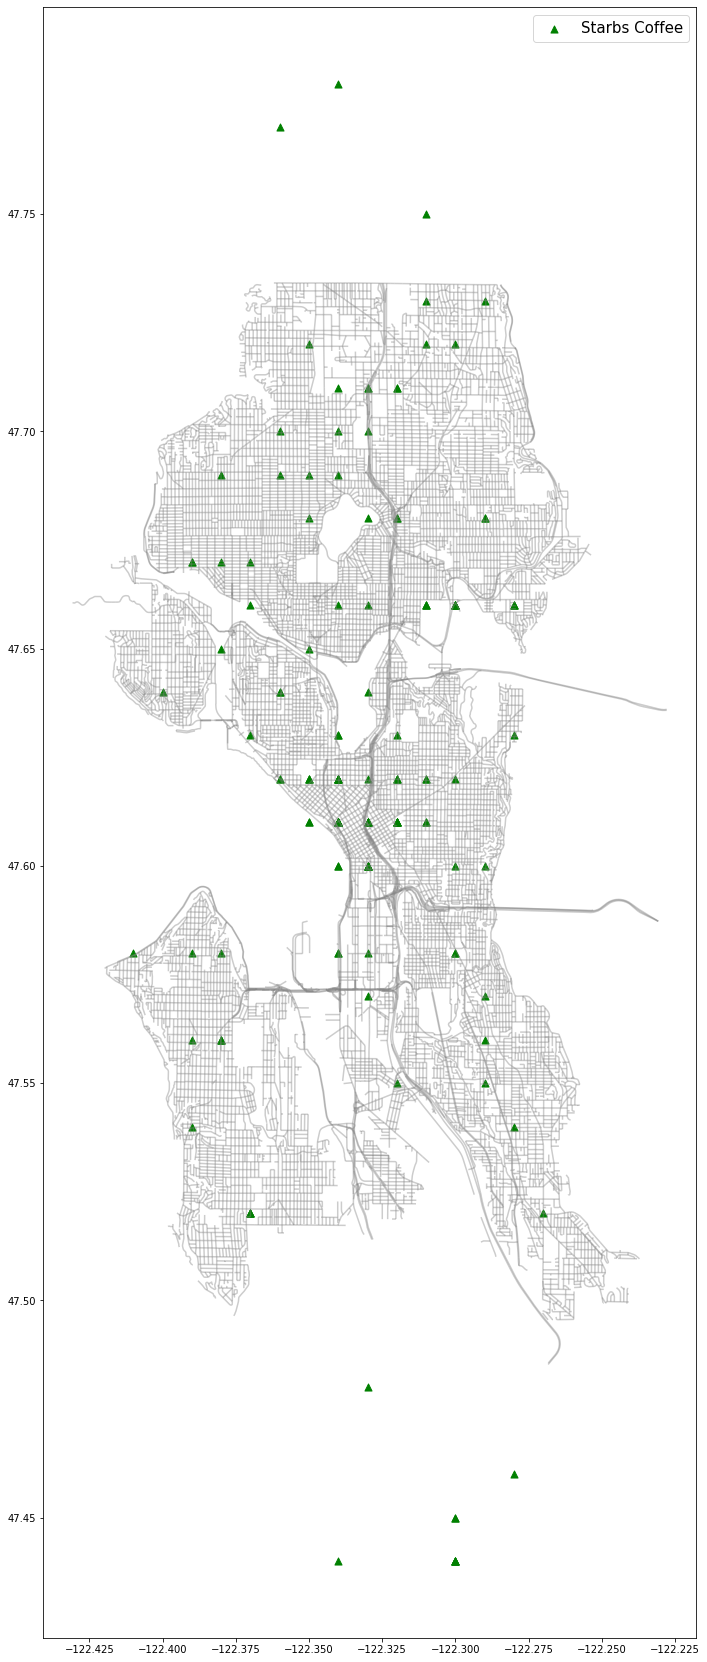

In [9]:
# Displaying the Seattle map with Starbucks locations per CSV file (geo_df)
# The lat and long don't have enough sig figs to yield significant results
fig,ax = plt.subplots(figsize = (30,30))
seattle_map.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df['City'] == 'Seattle'].plot(ax = ax, markersize = 50, color = "green", marker = "^", label = "Starbs Coffee")
plt.legend(prop={'size':15})

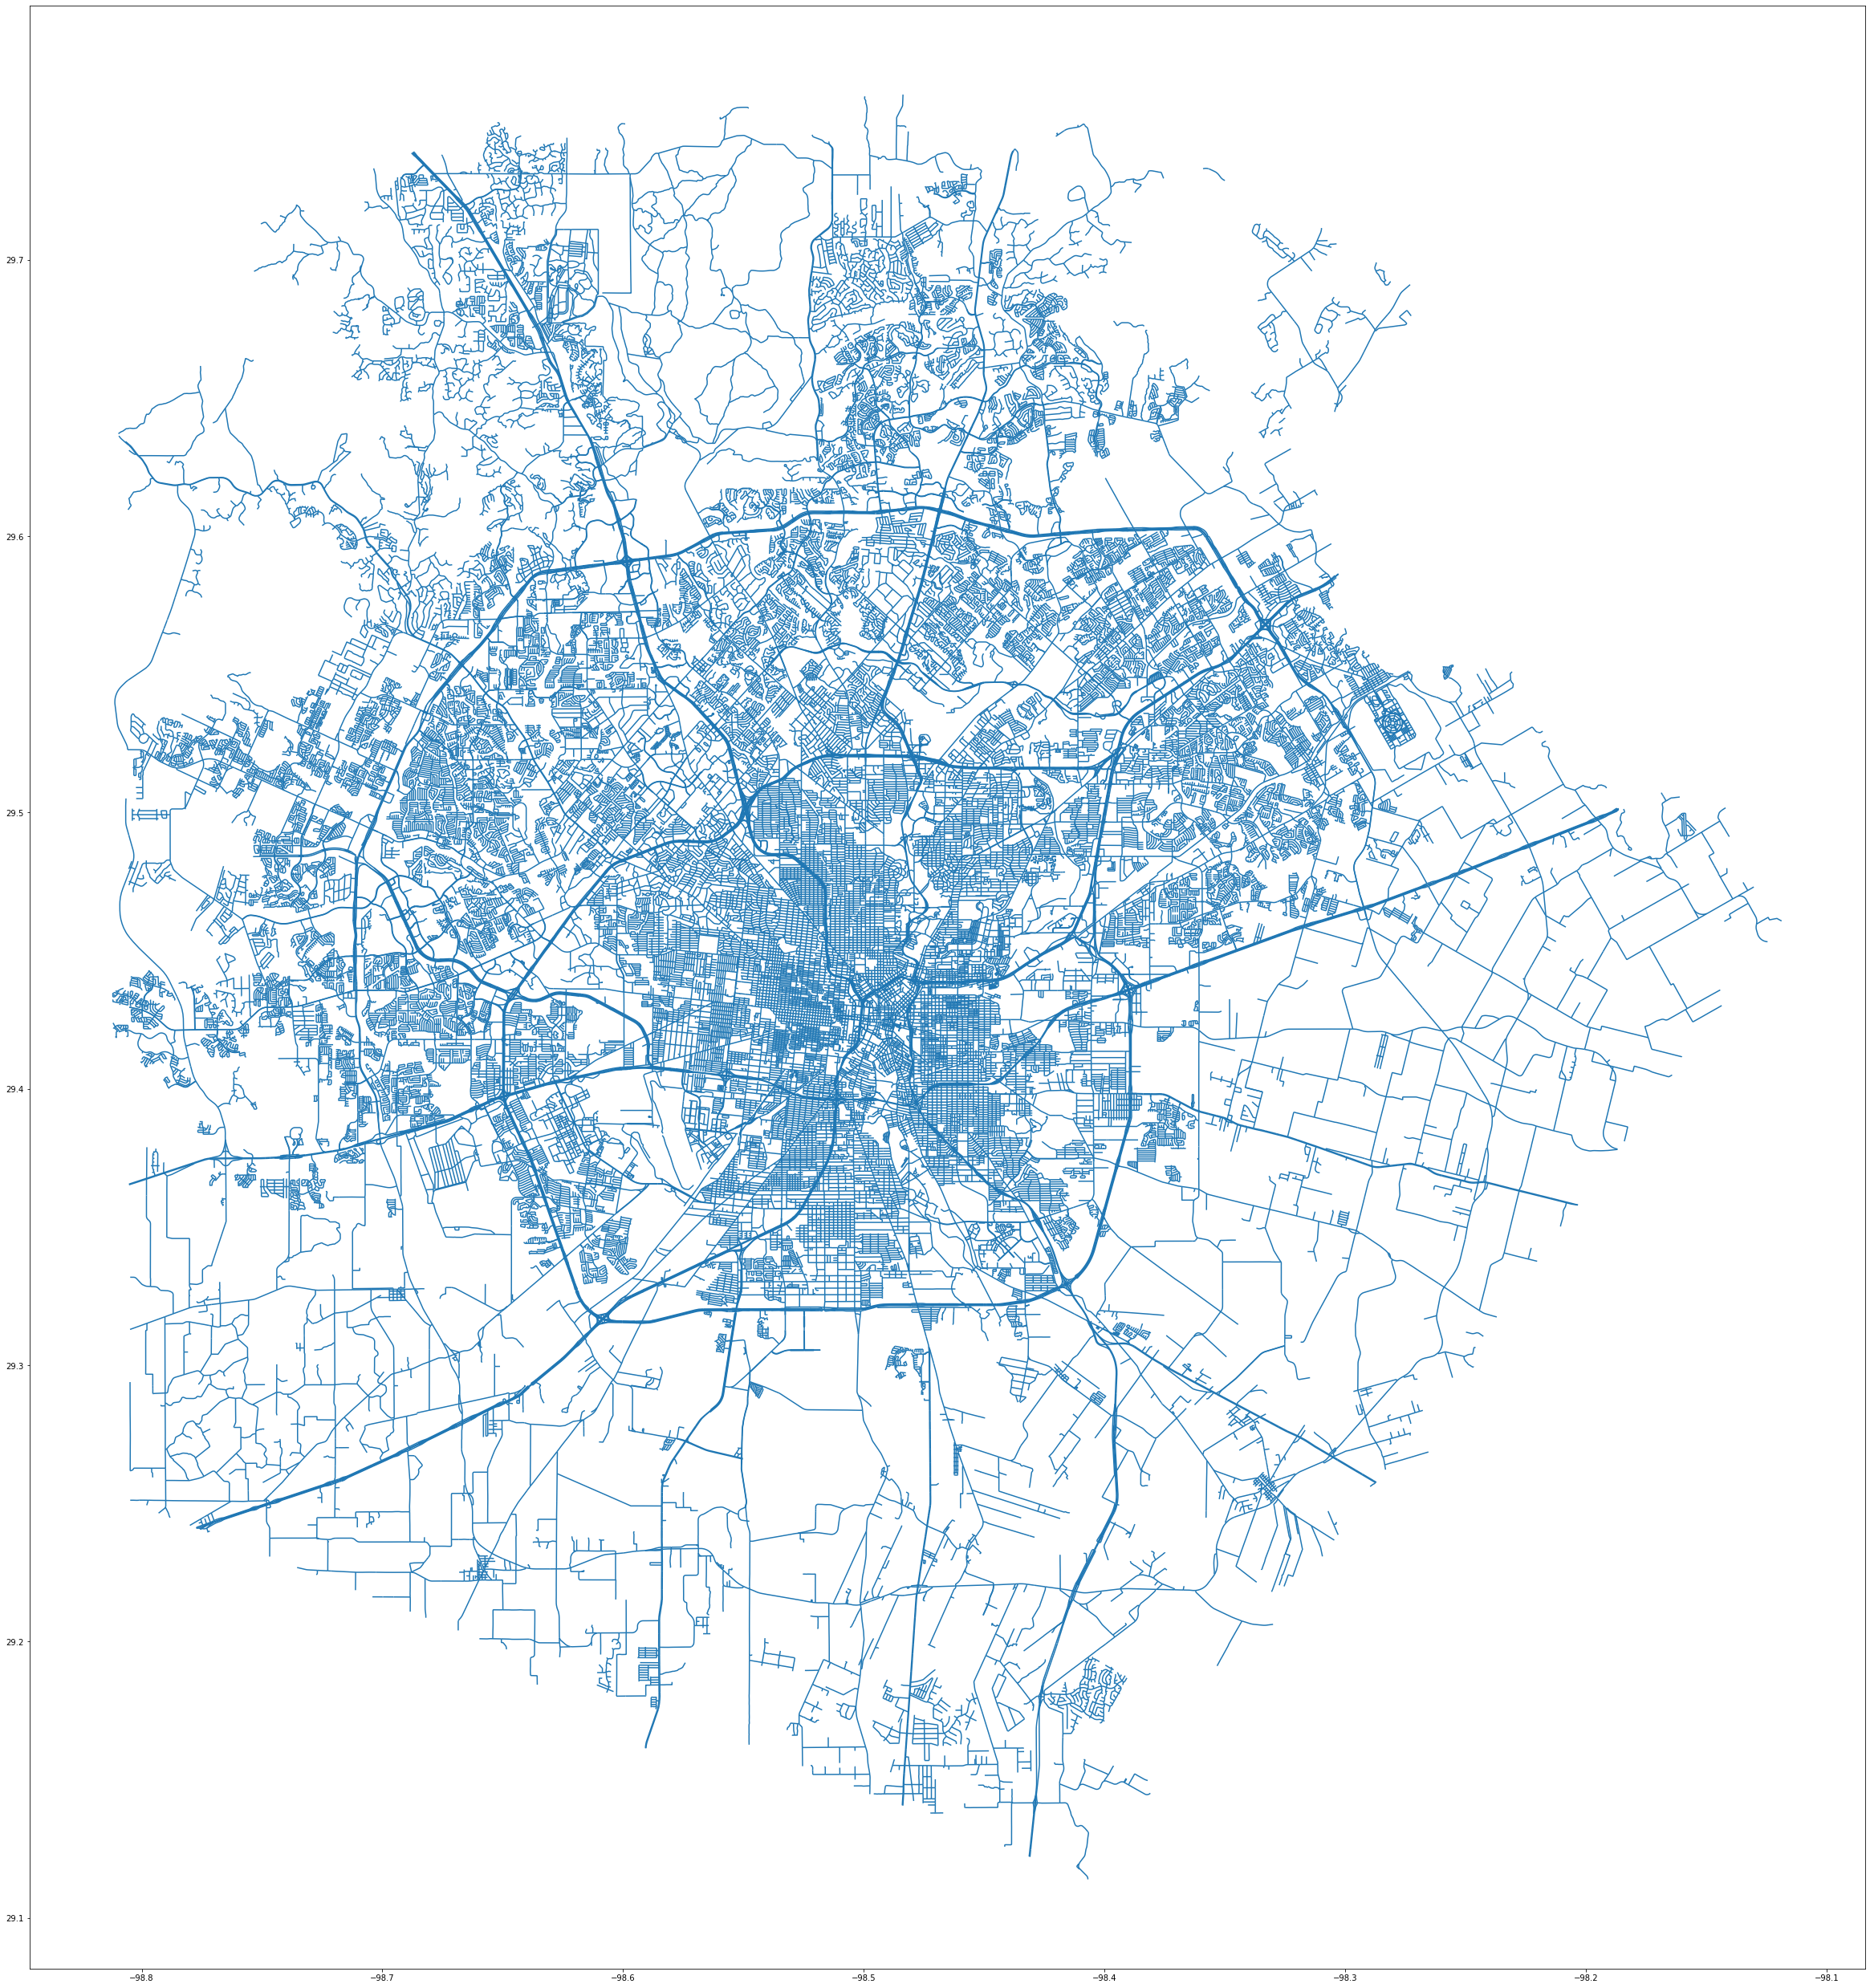

In [10]:
# San Antonio Map. Same process as above
shp_location = '/Users/emilybecker/Downloads/Streets-shp'
sa_map = gpd.read_file(shp_location)
fig,ax = plt.subplots(figsize = (45,45))
sa_map.plot(ax = ax)

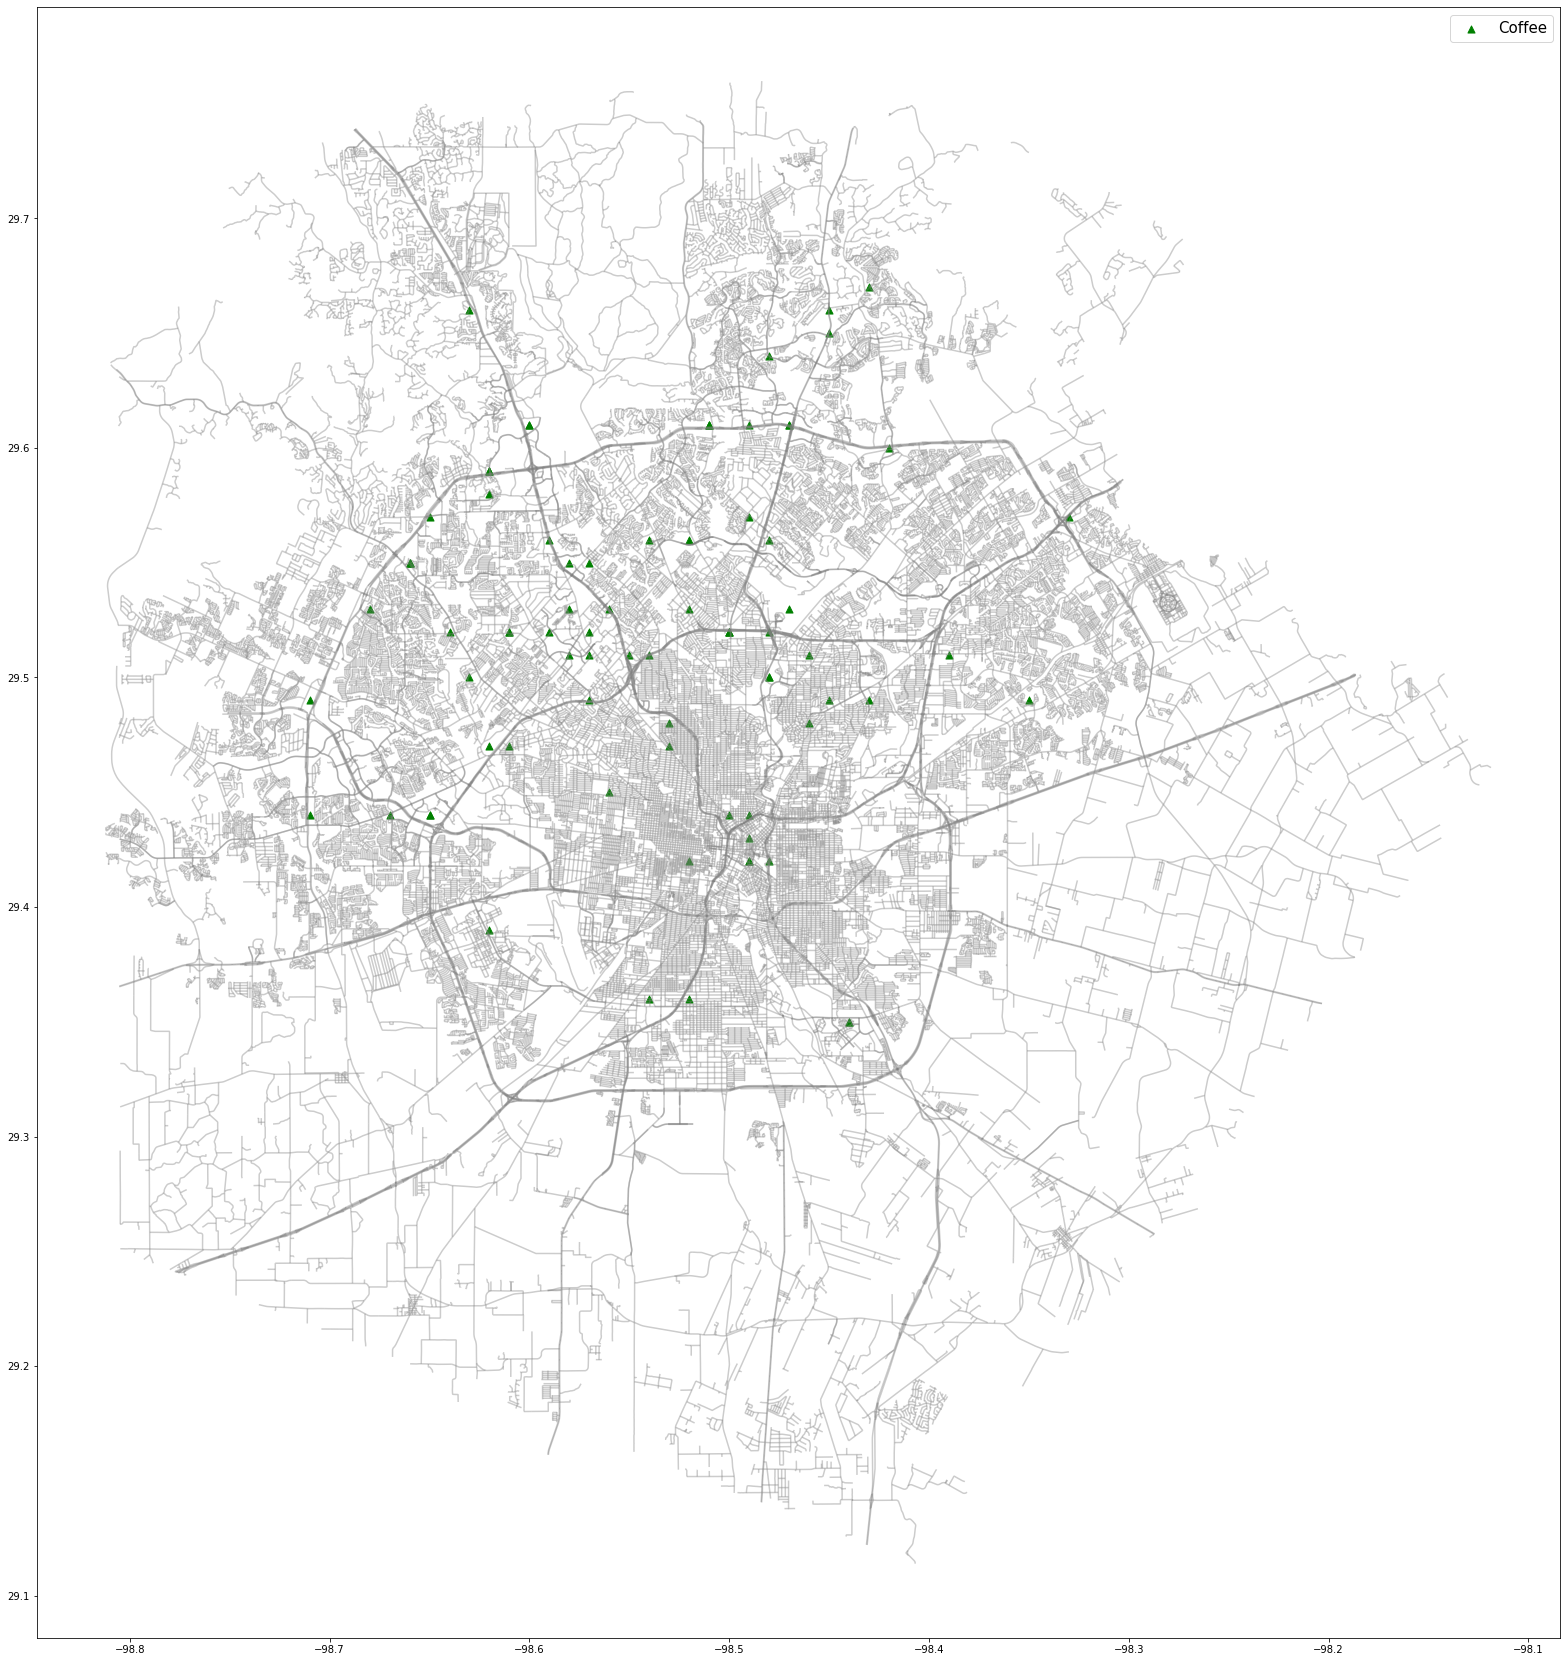

In [11]:
# Plot Starbucks locations in San Antonio
fig,ax = plt.subplots(figsize = (30,30))
sa_map.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df['City'] == 'San Antonio'].plot(ax = ax, markersize = 50, color = "green", marker = "^", label = "Coffee")
plt.legend(prop={'size':15})